In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
# 从本地文件系统中读取数据
ML_data = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第七章/ML_Data1.csv')
ML_data=ML_data.dropna()
ML_data.head()

,Return,Volatility,Beta1,Beta2,Cor1,Cor2,NonSysRisk1,NonSysRisk2,Rsq1,Rsq2,...,RevenuePerShareToP,OperatingNCFPerShare,OperatingNCFPerShareToP,OVS,NetProfitGrowth,EquityGrowth,RevenueGrowth,OperatingNCFGrowth,OGS,VCG
304,0.100000,0.636524,1.344635,1.359665,0.380837,0.388703,0.059495,0.061978,0.145037,0.151090,...,0.298921,0.372785,0.062758,0.103942,-2.76619,-0.028644,0.01371,0.124254,-0.664218,-0.768160
305,-0.043771,0.635464,1.350340,1.364497,0.382936,0.390602,0.059967,0.062392,0.146640,0.152570,...,0.312604,0.372785,0.065631,0.108700,-2.76619,-0.028644,0.01371,0.124254,-0.664218,-0.772918
306,-0.010563,0.628295,1.368196,1.383920,0.393167,0.401384,0.061703,0.064308,0.154581,0.161109,...,0.315941,0.372785,0.066332,0.109860,-2.76619,-0.028644,0.01371,0.124254,-0.664218,-0.774078
307,-0.037367,0.623566,1.368544,1.383909,0.395966,0.404139,0.061734,0.064309,0.156789,0.163328,...,0.328205,0.372785,0.068907,0.114125,-2.76619,-0.028644,0.01371,0.124254,-0.664218,-0.778343
308,0.003697,0.623572,1.368547,1.383838,0.396009,0.404171,0.061748,0.064320,0.156823,0.163355,...,0.326996,0.372785,0.068653,0.113704,-2.76619,-0.028644,0.01371,0.124254,-0.664218,-0.777922


In [17]:
# Calculate statistics for each column
statistics = ML_data.describe().transpose()

# Add count, median, and quartiles to the statistics dataframe
statistics['Count'] = ML_data.count()
statistics['Median'] = ML_data.median()
statistics['25%'] = ML_data.quantile(0.25)
statistics['50%'] = ML_data.quantile(0.5)
statistics['75%'] = ML_data.quantile(0.75)

# Display the statistics dataframe
print(statistics)


                          count          mean           std           min  \
Return                   1388.0  1.335404e-03  3.120415e-02 -1.001390e-01   
Volatility               1388.0  4.989543e-01  1.420439e-01  2.749510e-01   
Beta1                    1388.0  8.265536e-01  3.615738e-01  1.649570e-01   
Beta2                    1388.0  8.443116e-01  3.651207e-01  1.779560e-01   
Cor1                     1388.0  2.609234e-01  1.019692e-01  4.419700e-02   
Cor2                     1388.0  2.678084e-01  1.006428e-01  4.863800e-02   
NonSysRisk1              1388.0  2.093107e-02  1.893182e-02  6.070000e-04   
NonSysRisk2              1388.0  2.209208e-02  1.978259e-02  7.350000e-04   
Rsq1                     1388.0  7.847124e-02  5.452428e-02  1.953000e-03   
Rsq2                     1388.0  8.184303e-02  5.527188e-02  2.366000e-03   
ARsq1                    1388.0  7.475541e-02  5.474414e-02 -2.071000e-03   
ARsq2                    1388.0  7.814078e-02  5.549474e-02 -1.657000e-03   

In [18]:

X = ML_data.drop('Return', axis=1)
y = ML_data['Return']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
ridge = Ridge(alpha=1.0)  # alpha 是岭回归的正则化参数，你可以根据需要调整
ridge.fit(X_train, y_train)

# 预测测试集
y_pred = ridge.predict(X_test)


/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.6031e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


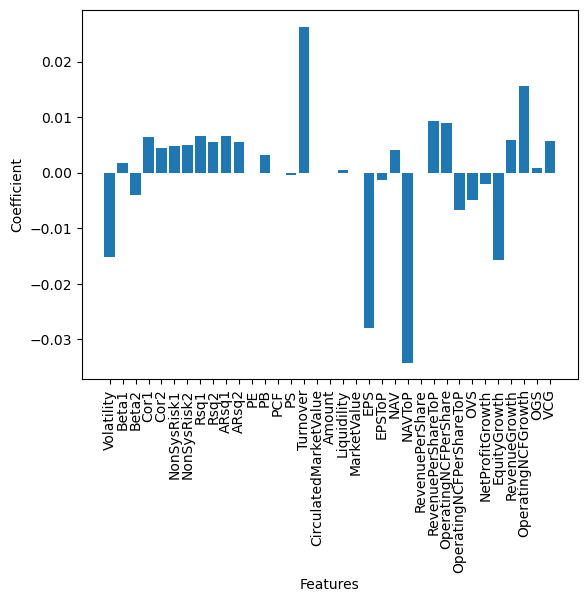

In [19]:
# 绘制各个特征的系数值
plt.figure()
plt.bar(X.columns, ridge.coef_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

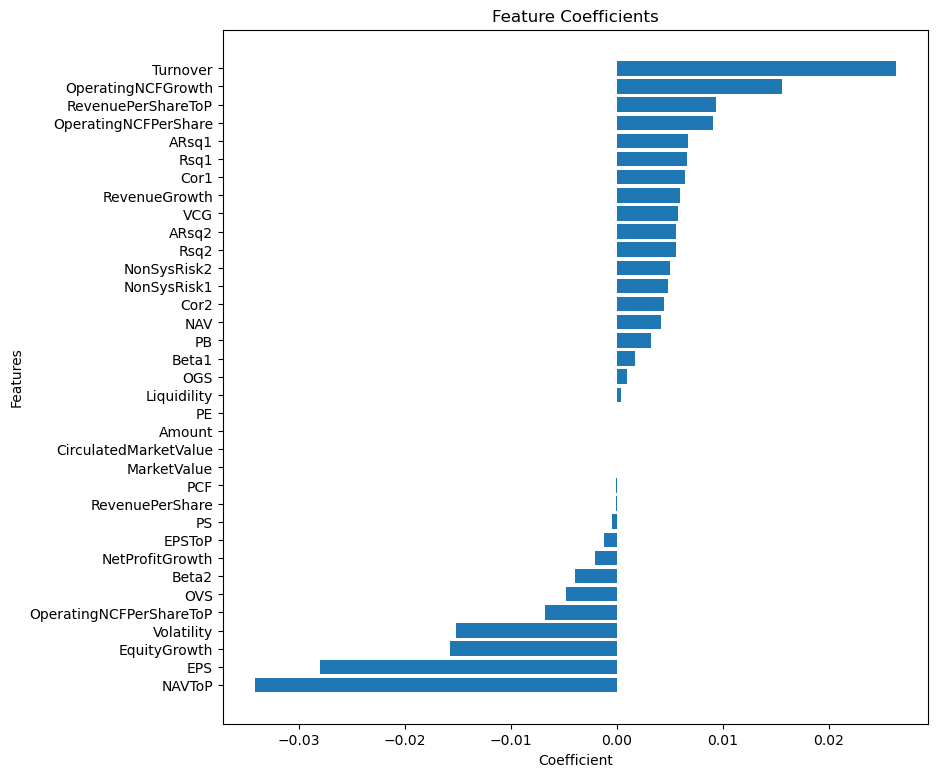

In [20]:


# 获取特征名称和对应系数值
feature_names = X.columns
coefficients = ridge.coef_

# 对系数值进行排序
sorted_indices = np.argsort(coefficients)
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# 绘制特征系数柱形图
plt.figure()
plt.barh(sorted_feature_names, sorted_coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients')
plt.tight_layout(pad=-10)  # 调整布局，增加间距
plt.show()


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
# 从本地文件系统中读取数据
ML_data = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第七章/DL_Data1.csv')
ML_data=ML_data.dropna()
ML_data.head()

,Return,Volatility,Beta1,Beta2,Cor1,Cor2,NonSysRisk1,NonSysRisk2,Rsq1,Rsq2,...,OperatingNCFPerShareToP,DividentPerShare,DividentPerShareToP,OVS,NetProfitGrowth,EquityGrowth,RevenueGrowth,OperatingNCFGrowth,OGS,VCG
56,0.200627,0.583365,0.716008,0.726709,0.184198,0.188873,0.012349,0.012984,0.033929,0.035673,...,0.017017,0.040,0.005222,0.102220,0.235853,0.051708,0.228858,-0.004785,0.127909,0.025689
75,0.200501,0.383995,0.913849,0.923003,0.409555,0.416662,0.025676,0.026575,0.167735,0.173607,...,-0.102162,0.015,0.003132,0.087848,0.423502,0.134559,0.049350,-0.204523,0.100722,0.012874
86,0.200431,0.423533,0.806881,0.831737,0.278495,0.292493,0.014550,0.016050,0.077559,0.085552,...,0.030914,0.200,0.017953,0.111115,0.127211,0.184938,-0.009062,-0.076303,0.056696,-0.054419
94,0.200397,0.518040,0.943050,0.929599,0.254375,0.254799,0.018665,0.018727,0.064707,0.064923,...,0.015923,0.025,0.002066,0.155642,-0.099972,0.049222,0.175474,0.953694,0.269605,0.113963
101,0.200378,0.550201,1.066480,1.068627,0.284123,0.290532,0.025388,0.026546,0.080726,0.084409,...,-0.003065,0.018,0.001417,0.072816,1.372415,0.067038,0.200817,1.105968,0.686560,0.613744


In [22]:

X = ML_data.drop('Return', axis=1)
y = ML_data['Return']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
ridge = Ridge(alpha=1.0)  # alpha 是岭回归的正则化参数，你可以根据需要调整
ridge.fit(X_train, y_train)

# 预测测试集
y_pred = ridge.predict(X_test)


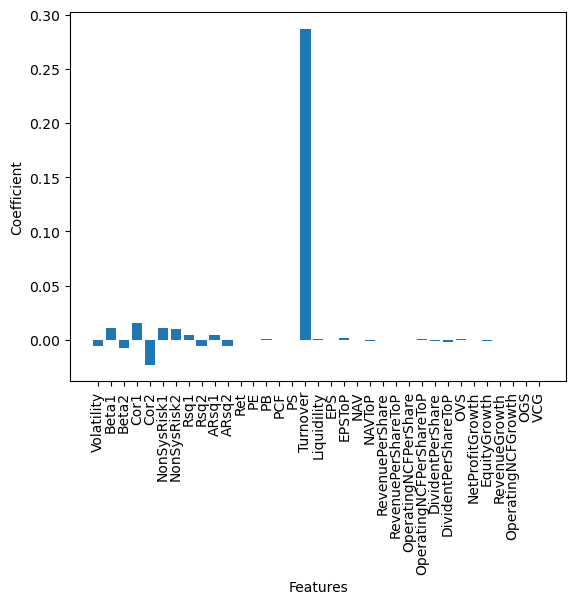

In [14]:
# 绘制各个特征的系数值
plt.figure()
plt.bar(X.columns, ridge.coef_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

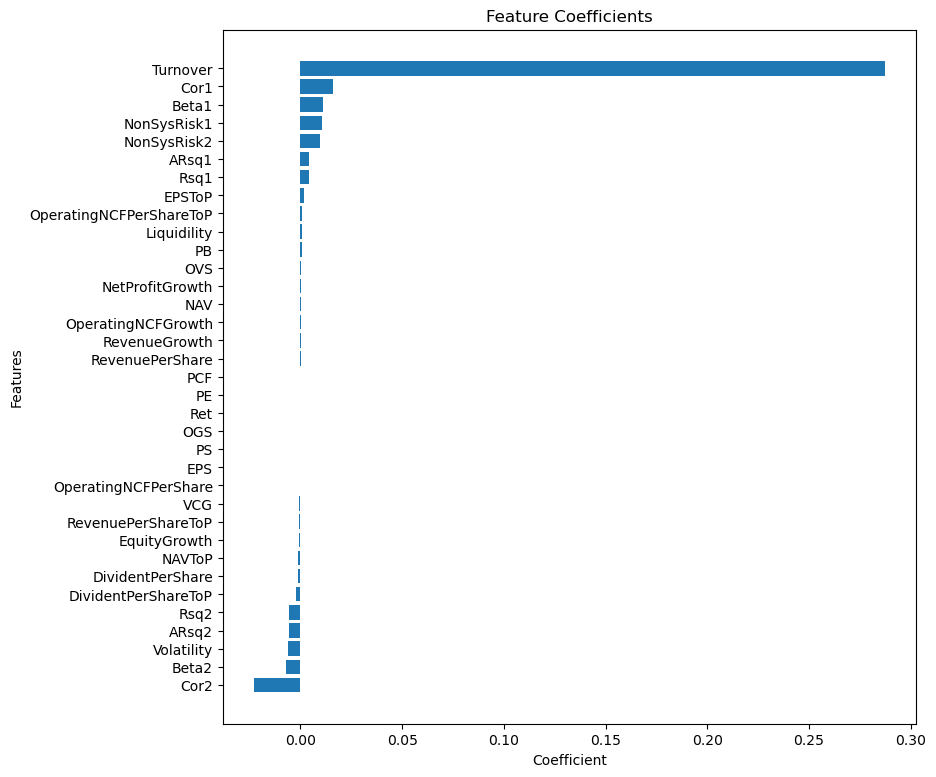

In [23]:

# 获取特征名称和对应系数值
feature_names = X.columns
coefficients = ridge.coef_

# 对系数值进行排序
sorted_indices = np.argsort(coefficients)
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# 绘制特征系数柱形图
plt.figure()
plt.barh(sorted_feature_names, sorted_coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients')
plt.tight_layout(pad=-10)  # 调整布局，增加间距
plt.show()